In [1]:
using LinearAlgebra
using JLD
using ProgressMeter
using Plots, LaTeXStrings
include("../alpcahFamily.jl")
include("../helperFunctions.jl")

PCA (generic function with 1 method)

In [2]:
k = 5 # rank estimate

5

# Data Loading

In [3]:
Yfull, vfull = load("astroData.jld", "Yfull", "vfull");

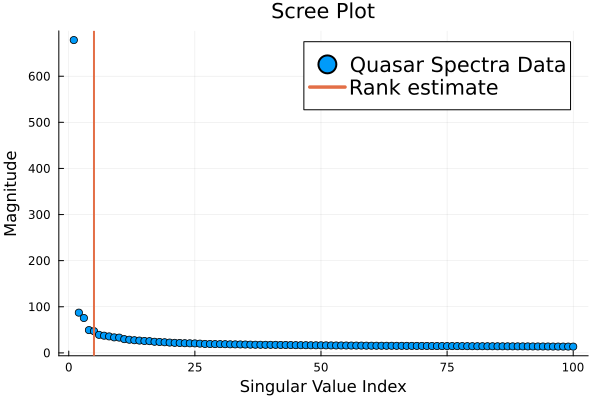

In [4]:
scatter(svdvals(Yfull[:,1:2000])[1:100], title="Scree Plot", label="Quasar Spectra Data", xlabel="Singular Value Index", ylabel="Magnitude", legendfontsize=14)
vline!([k], linewidth=2, label="Rank estimate")

# Code

In [5]:
U = svd(Yfull[:,1:2000]).U[:,1:k] # ground truth subspace
testidx = [1:3000; length(vfull)-2000+1:length(vfull)]
Y = Yfull[:,testidx]
v = vfull[testidx]
n = length(v);
Ylist = []
for i = 1:n
    push!(Ylist, Y[:,i])
end
nothing

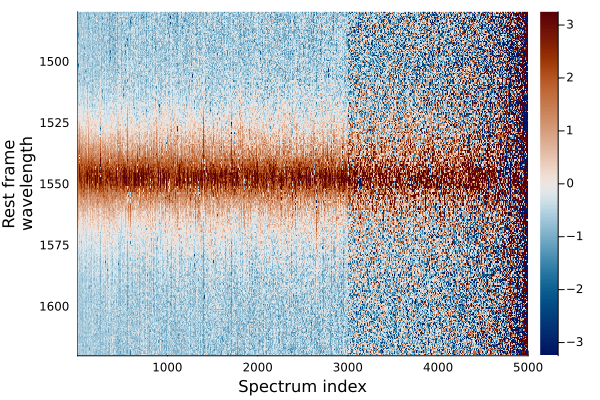

In [6]:
heatmap(1:n, 1480:0.5:1620, Y, colormap = :vik, yflip=true, clim=(-3.25,3.25),ylabel = "Rest frame\nwavelength", xlabel = "Spectrum index")

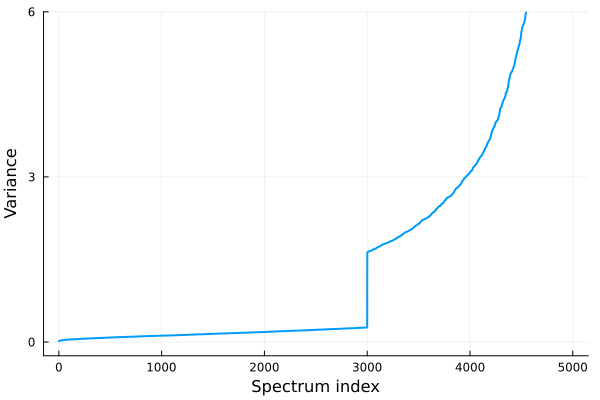

In [7]:
plot(1:n, v, ylim=[-0.25,6], yticks = 0:3:6, xlabel = "Spectrum index", ylabel = "Variance", linewidth=2, label="")

In [8]:
U_ALPCAH = ALPCAH(Y, k, 70; μ=0.1, ρ=1.02, alpcahIter=100, varfloor=1e-9)
affinityError(U,U_ALPCAH)

0.7817696575487377

In [9]:
iterVec = [1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10]
niter = length(iterVec)
alpcahError = zeros(niter)
alpcahFactorizedError = zeros(niter)
heppcatError = zeros(niter)
pcaError = affinityError(U, PCA(Y,k))
pcaGood = affinityError(U, PCA(Y[:,1:3000],k))
pcaBad = affinityError(U, PCA(Y[:,3001:end],k))
p = Progress(niter)
Threads.@threads for i=1:niter
    U_HEPP = heppcat(Ylist, k, iterVec[i]; varfloor=1e-9).U
    heppcatError[i] = affinityError(U, U_HEPP)
    U_LR_ALPCAH = LR_ALPCAH(Y,k; alpcahIter=iterVec[i], varfloor=1e-9)
    alpcahFactorizedError[i] = affinityError(U,U_LR_ALPCAH)
    # U_ALPCAH = ALPCAH(Y, k, 1; μ=0.01, ρ=1.0, alpcahIter=iterVec[i], varfloor=1e-9)
    # alpcahError[i] = affinityError(U,U_ALPCAH)
    next!(p)
end
finish!(p)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:12


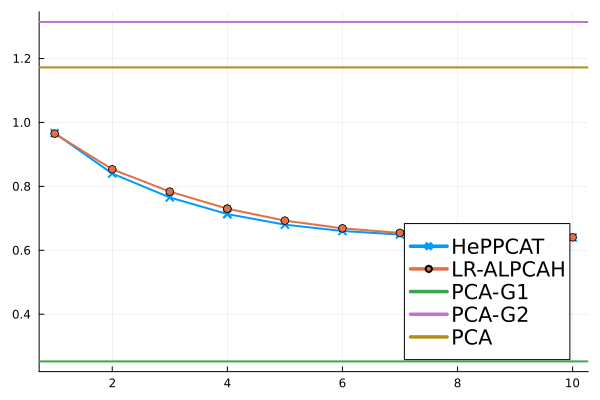

In [10]:
plot(iterVec, heppcatError, label="HePPCAT", marker=:x,linewidth=2, legendfontsize=14)
plot!(iterVec, alpcahFactorizedError, label="LR-ALPCAH", marker=:o, linewidth=2)
hline!([pcaGood],label="PCA-G1",linewidth=2)
hline!([pcaBad], label="PCA-G2",linewidth=2)
hline!([pcaError], label="PCA",linewidth=2)

In [11]:
U = svd(Yfull[:,1:2000]).U[:,1:k] # ground truth subspace
#testidx = [3001:8000; length(vfull)-2000+1:length(vfull)]
testidx = 2001:7000
Y = Yfull[:,testidx]
v = vfull[testidx]
n = length(v);
Ylist = []
for i = 1:n
    push!(Ylist, Y[:,i])
end
nothing

In [12]:
pcaGood = affinityError(U, PCA(Y[:,1:1000],k))

0.5079540254750301

In [13]:
pcaBad = affinityError(U, PCA(Y[:,1001:end],k))

0.3558366752020305

In [14]:
affinityError(U, LR_ALPCAH(Y[:,1:end],k; alpcahIter=100, varfloor=1e-9))

0.2523851179632949

In [15]:
U_ALPCAH = ALPCAH(Y, k, 1; μ=0.1, ρ=1.02, alpcahIter=100, varfloor=1e-9)
affinityError(U,U_ALPCAH)

0.3656093490620607

In [16]:
iterVec = [1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10]
niter = length(iterVec)
alpcahError = zeros(niter)
alpcahFactorizedError = zeros(niter)
heppcatError = zeros(niter)
pcaError = affinityError(U, PCA(Y,k))
pcaGood = affinityError(U, PCA(Y[:,1:1000],k))
pcaBad = affinityError(U, PCA(Y[:,1001:end],k))
p = Progress(niter)
Threads.@threads for i=1:niter
    U_HEPP = heppcat(Ylist, k, iterVec[i]; varfloor=1e-9).U
    heppcatError[i] = affinityError(U, U_HEPP)
    U_LR_ALPCAH = LR_ALPCAH(Y,k; alpcahIter=iterVec[i], varfloor=1e-9)
    alpcahFactorizedError[i] = affinityError(U,U_LR_ALPCAH)
    # U_ALPCAH = ALPCAH(Y, k, 1; μ=0.01, ρ=1.0, alpcahIter=iterVec[i], varfloor=1e-9)
    # alpcahError[i] = affinityError(U,U_ALPCAH)
    next!(p)
end
finish!(p)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07


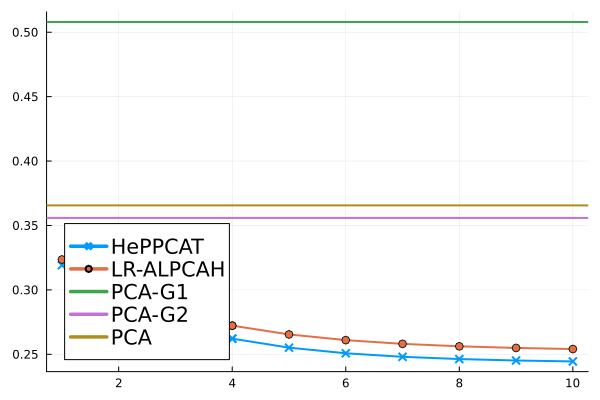

In [17]:
plot(iterVec, heppcatError, label="HePPCAT", marker=:x,linewidth=2, legendfontsize=14)
plot!(iterVec, alpcahFactorizedError, label="LR-ALPCAH", marker=:o, linewidth=2)
hline!([pcaGood],label="PCA-G1",linewidth=2)
hline!([pcaBad], label="PCA-G2",linewidth=2)
hline!([pcaError], label="PCA",linewidth=2)